This example is motivated from an example where a carefully chose snapshot of data was used to prove that global temperatures are not increasing with time. 

You will solve linear regression (ax+b) for two snapshots of data to see if there is an average increase of tempearture with time or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data from: https://www.jpl.nasa.gov/edu/teach/activity/graphing-global-temperature-trends/
!wget -o globalTemp.csv https://www.dropbox.com/s/w5n763mnroln66v/globalTemp.csv?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
df=pd.read_csv('globalTemp.csv')

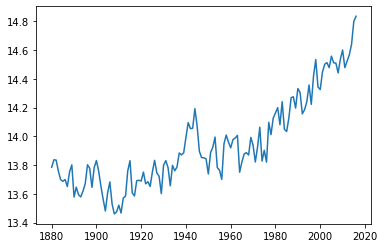

In [27]:
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

plt.plot(x,y)

In [4]:
#linear Regression here
def Predict(x,y, noOfBases = 2):
    weightConstants = []

    for i in range(noOfBases + 1):
        weightConstants.append(x**i)

    weightConstants = np.array(weightConstants)
    weightConstants = weightConstants.T

    weights = np.linalg.inv(weightConstants.T @ weightConstants) @ (weightConstants.T @ y)

    PredictedValues = weightConstants @ weights
    return PredictedValues


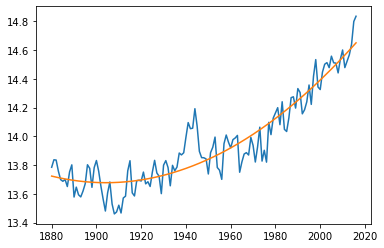

In [6]:
Predicted = Predict(x,y, 3)
plt.plot(x,y,x,Predicted)

In [32]:
# Using Sklearn instead of normal linear regression
import sklearn.linear_model as lm
import sklearn.preprocessing as preprocessing
import sklearn.pipeline as pipeline


pipeline = pipeline.Pipeline([ ('basis', preprocessing.PolynomialFeatures(2)), ('model', lm.LinearRegression())])
pipeline.fit(x.reshape(-1,1),y.reshape(-1,1))
predicted=pipeline.predict(x.reshape(-1,1))
plt.plot(x,y,x,predicted)

NameError: name 'X' is not defined

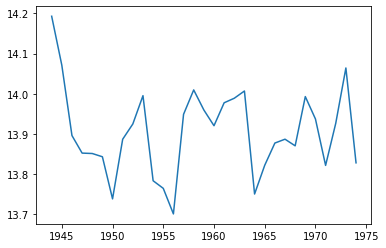

In [30]:
df=df[(df['Year']>1943) & (df['Year']<1975)]
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()
plt.plot(x,y)

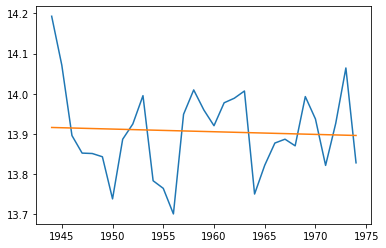

In [8]:
#linear Regression here
plt.plot(x,y,x,Predict(x,y, 4))
